In [1]:
#https://drive.google.com/file/d/1KGvB1b5N-F44SyyvbhPi2IapLRy0pjGO/view?usp=sharing
%%shell
pip -q install --upgrade --no-cache-dir gdown
gdown -q 1KGvB1b5N-F44SyyvbhPi2IapLRy0pjGO
rm -rf ./data/
unzip -q ojects-data.zip
echo 'Data files in: data/'

Data files in: data/


Original Image


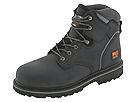

Rotated 90 Degrees


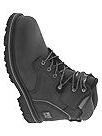

Rotated 180 Degrees


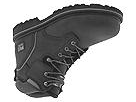

Rotated 270 Degrees


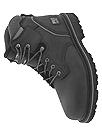

In [3]:
import cv2
from google.colab.patches import cv2_imshow
# Đọc ảnh
image = cv2.imread("/content/data/Boot/boot (100).jpg")

# Xoay ảnh 90 độ
rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_90 = cv2.cvtColor(rotated_90, cv2.COLOR_BGR2GRAY)
# Xoay ảnh 180 độ
rotated_180 = cv2.rotate(image, cv2.ROTATE_180)
rotated_180 = cv2.cvtColor(rotated_180, cv2.COLOR_BGR2GRAY)
# Xoay ảnh 270 độ
rotated_270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_270 = cv2.cvtColor(rotated_270, cv2.COLOR_BGR2GRAY)
# Hiển thị ảnh gốc
print("Original Image")
cv2_imshow(image)

# Hiển thị ảnh xoay 90 độ
print("Rotated 90 Degrees")
cv2_imshow(rotated_90)

# Hiển thị ảnh xoay 180 độ
print("Rotated 180 Degrees")
cv2_imshow(rotated_180)

# Hiển thị ảnh xoay 270 độ
print("Rotated 270 Degrees")
cv2_imshow(rotated_270)

# Chờ người dùng nhấn phím bất kỳ để đóng cửa sổ
cv2.waitKey(0)
cv2.destroyAllWindows()


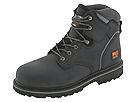

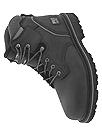

Góc quay của ảnh: 89.75961881665415 độ


In [4]:
import cv2
import numpy as np

def tim_goc_quay(anh_goc, anh_quay):
    # Phát hiện key points và tính toán descriptors bằng thuật toán ORB
    orb = cv2.ORB_create()
    key_points_goc, des_goc = orb.detectAndCompute(anh_goc, None)
    key_points_quay, des_quay = orb.detectAndCompute(anh_quay, None)

    # Sử dụng BFMatcher để tìm các điểm tương đồng
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des_goc, des_quay)

    # Sắp xếp các điểm dựa trên khoảng cách
    matches = sorted(matches, key=lambda x: x.distance)

    # Lấy 100 điểm tốt nhất
    good_matches = matches[:100]

    # Tính ma trận biến đổi (homography) dựa trên điểm tương đồng
    src_pts = np.float32([key_points_goc[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([key_points_quay[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    ma_tran_bien_doi, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Tính góc quay
    goc_quay_rad = np.arctan2(ma_tran_bien_doi[0, 1], ma_tran_bien_doi[0, 0])
    goc_quay_deg = np.degrees(goc_quay_rad)
    goc_quay_deg = (goc_quay_deg + 360) % 360
    cv2_imshow(anh_goc)
    cv2_imshow(anh_quay)
    return goc_quay_deg

# Tính góc quay
goc_quay = tim_goc_quay(image, rotated_270)

print(f"Góc quay của ảnh: {goc_quay} độ")
